In [1]:
#%%
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
sns.set()
sns.set_context("paper", rc={"axes.labelsize":10})

Recommendations from **2nd Fleet**
For:  Accelerator_Pedal_Position_D_
t-statistic: -8.475424384901551
P-value: 8.325735585142946e-17
The difference in means is statistically significant, recommendation possible


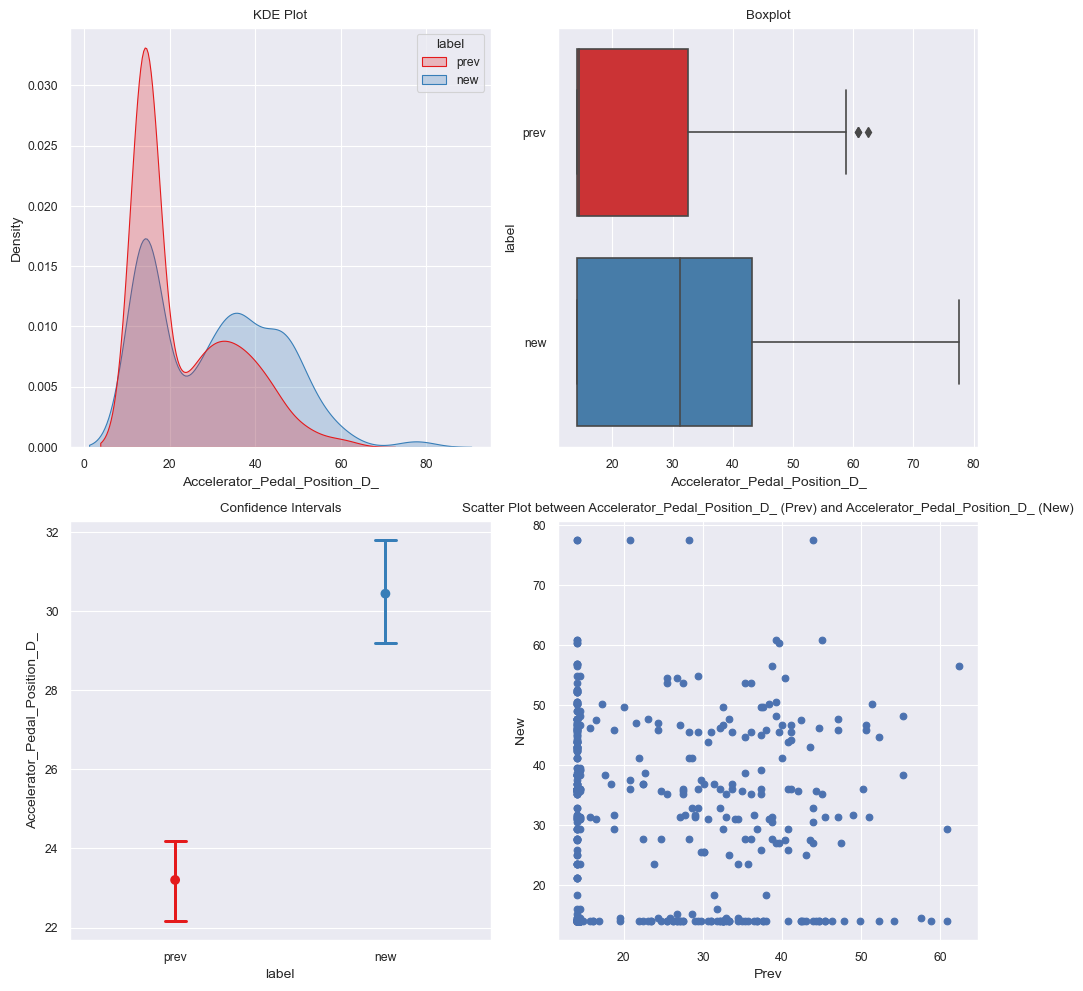

Mean of Accelerator_Pedal_Position_D_ (prev): 23.204
Mean of Accelerator_Pedal_Position_D_ (new): 30.441
Median of Accelerator_Pedal_Position_D_ (prev): 14.500
Median of Accelerator_Pedal_Position_D_ (new): 31.200
Standard deviation of Accelerator_Pedal_Position_D_ (prev): 11.899
Standard deviation of Accelerator_Pedal_Position_D_ (new): 14.906
--------------------
For:  Accelerator_Pedal_Position_E_
t-statistic: -9.18842919732572
P-value: 2.251218584192523e-19
The difference in means is statistically significant, recommendation possible


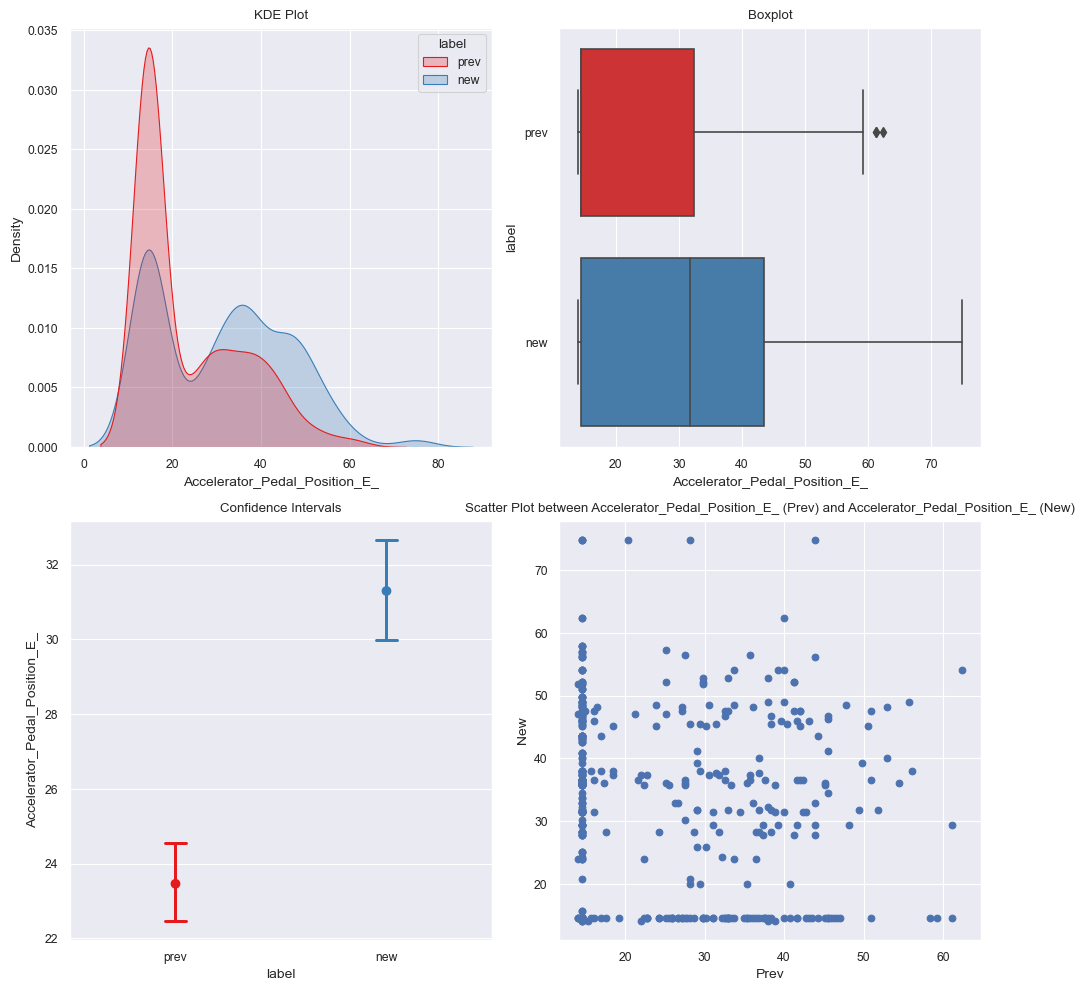

Mean of Accelerator_Pedal_Position_E_ (prev): 23.461
Mean of Accelerator_Pedal_Position_E_ (new): 31.299
Median of Accelerator_Pedal_Position_E_ (prev): 14.500
Median of Accelerator_Pedal_Position_E_ (new): 31.800
Standard deviation of Accelerator_Pedal_Position_E_ (prev): 11.930
Standard deviation of Accelerator_Pedal_Position_E_ (new): 14.857
--------------------


In [2]:
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

def make_recommendation_df(prev, new):
    prev['label'] = ['prev'] * len(prev)
    new['label'] = ['new'] * len(new)

    return pd.concat([prev, new], axis=0).reset_index(drop=True)


def independent_t_test(df, col):
    group1, group2 = df[df.label == 'prev'][col], df[df.label == 'new'][col]
    t_stat, p_value = scipy.stats.ttest_ind(group1, group2)

    print(f"t-statistic: {t_stat}")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print("The difference in means is statistically significant, recommendation possible")
        return True
    else:
        print("There is no significant difference in means, recommendation not possible")
        return False


def plot_side_by_side(df, column):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    # KDE plot
    sns.kdeplot(x=column, data=df, hue='label', ax=axes[0, 0], palette='Set1', fill=True)
    axes[0, 0].set_title('KDE Plot')

    # Boxplot
    sns.boxplot(x=column, y='label', data=df, ax=axes[0, 1], palette='Set1')
    axes[0, 1].set_title('Boxplot')

    # Confidence Intervals
    sns.pointplot(x='label', y=column, data=df, ax=axes[1, 0], capsize=.1, palette='Set1')
    axes[1, 0].set_title('Confidence Intervals')

    # Scatter plot between fleets columns
    prev_data = df[df['label'] == 'prev']
    new_data = df[df['label'] == 'new']
    axes[1, 1].scatter(prev_data[column], new_data[column])
    axes[1, 1].set_xlabel('Prev')
    axes[1, 1].set_ylabel('New')
    axes[1, 1].set_title(f'Scatter Plot between {column} (Prev) and {column} (New)')

    plt.tight_layout()
    plt.show()


def make_recommendation(prev_location, new_location, recom_from):
    prev_df = pd.read_csv(prev_location)
    prev_df = prev_df[prev_df.label == 'fleet4']
    df2 = pd.read_csv(new_location)

    cols_needed = ['Accelerator_Pedal_Position_D_', 'Accelerator_Pedal_Position_E_']

    df_recom = make_recommendation_df(prev_df[cols_needed].sample(500), df2[cols_needed])

    print("Recommendations from {}".format(recom_from))
    print("=" * 50)

    for i in cols_needed:
        print("For: ", i)

        t_bool = independent_t_test(df_recom, i)

        if t_bool:
            plot_side_by_side(df_recom, i)

        # Additional statistics
        print(f"Mean of {i} (prev): {np.mean(df_recom[df_recom['label'] == 'prev'][i]):.3f}")
        print(f"Mean of {i} (new): {np.mean(df_recom[df_recom['label'] == 'new'][i]):.3f}")
        print(f"Median of {i} (prev): {np.median(df_recom[df_recom['label'] == 'prev'][i]):.3f}")
        print(f"Median of {i} (new): {np.median(df_recom[df_recom['label'] == 'new'][i]):.3f}")
        print(f"Standard deviation of {i} (prev): {np.std(df_recom[df_recom['label'] == 'prev'][i]):.3f}")
        print(f"Standard deviation of {i} (new): {np.std(df_recom[df_recom['label'] == 'new'][i]):.3f}")
        print("-" * 20)


prev_loc = "C:\\Users\\ragha\\OneDrive\\Desktop\\Data_science\\Data_sciecne_project_1\\Project_2\\10.35097-1130\\Final_df\\final_df_preprocessed.csv"
new_loc = "Fleet_2_Predicted.csv"

make_recommendation(prev_loc, new_loc, "**2nd Fleet**")


Recommendations from **3rd Fleet**
For:  Accelerator_Pedal_Position_D_
t-statistic: -6.745644668377099
P-value: 2.5767338977216535e-11
The difference in means is statistically significant, recommendation possible


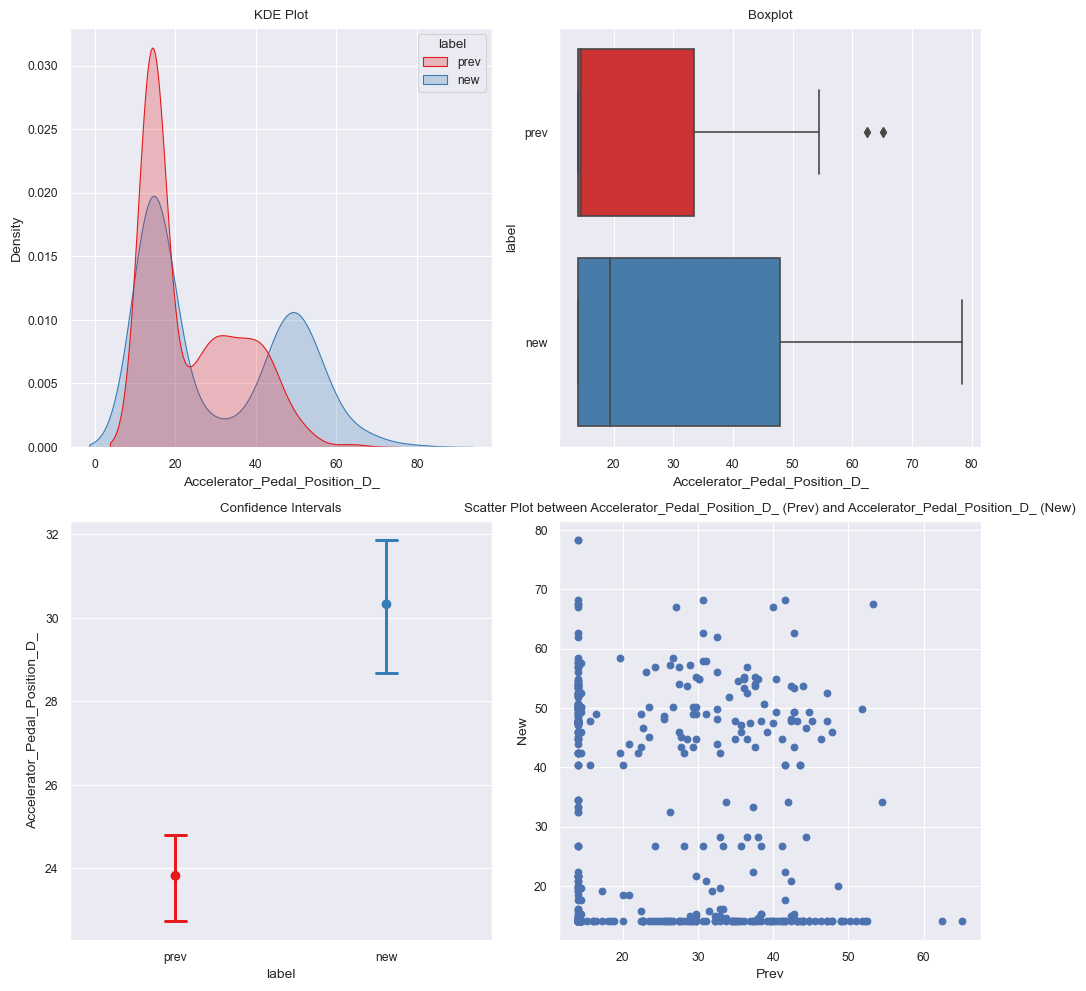

Mean of Accelerator_Pedal_Position_D_ (prev): 23.823
Mean of Accelerator_Pedal_Position_D_ (new): 30.328
Median of Accelerator_Pedal_Position_D_ (prev): 14.500
Median of Accelerator_Pedal_Position_D_ (new): 19.400
Standard deviation of Accelerator_Pedal_Position_D_ (prev): 11.956
Standard deviation of Accelerator_Pedal_Position_D_ (new): 17.920
--------------------
For:  Accelerator_Pedal_Position_E_
t-statistic: -9.734906078108231
P-value: 1.8592771228293227e-21
The difference in means is statistically significant, recommendation possible


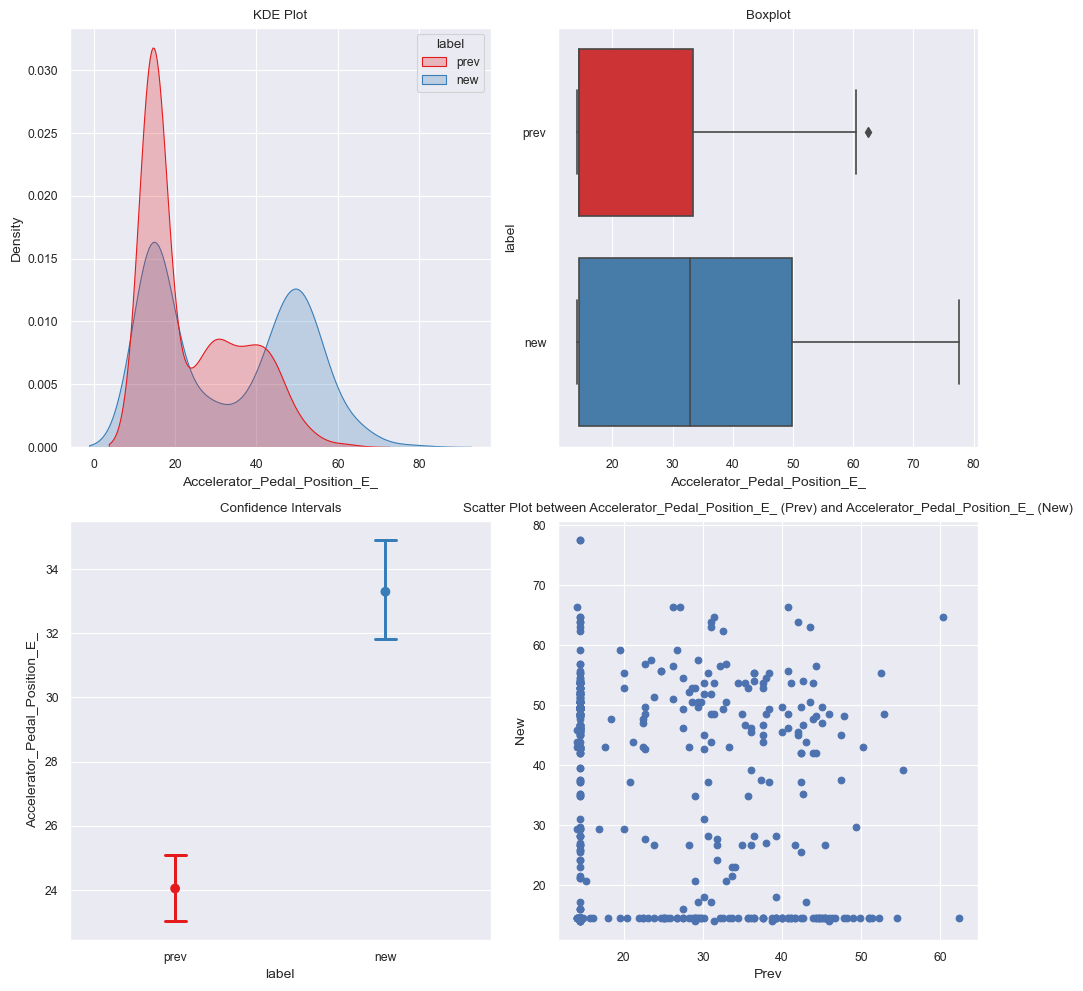

Mean of Accelerator_Pedal_Position_E_ (prev): 24.042
Mean of Accelerator_Pedal_Position_E_ (new): 33.297
Median of Accelerator_Pedal_Position_E_ (prev): 14.500
Median of Accelerator_Pedal_Position_E_ (new): 32.950
Standard deviation of Accelerator_Pedal_Position_E_ (prev): 11.960
Standard deviation of Accelerator_Pedal_Position_E_ (new): 17.550
--------------------


In [3]:
prev_loc = "C:\\Users\\ragha\\OneDrive\\Desktop\\Data_science\\Data_sciecne_project_1\\Project_2\\10.35097-1130\\Final_df\\final_df_preprocessed.csv"
new_loc = "Fleet_3_Predicted.csv"

make_recommendation(prev_loc, new_loc, "**3rd Fleet**")

Recommendations from **4th Fleet**
For:  Accelerator_Pedal_Position_D_
t-statistic: 11.287533983634187
P-value: 6.828946832758941e-28
The difference in means is statistically significant, recommendation possible


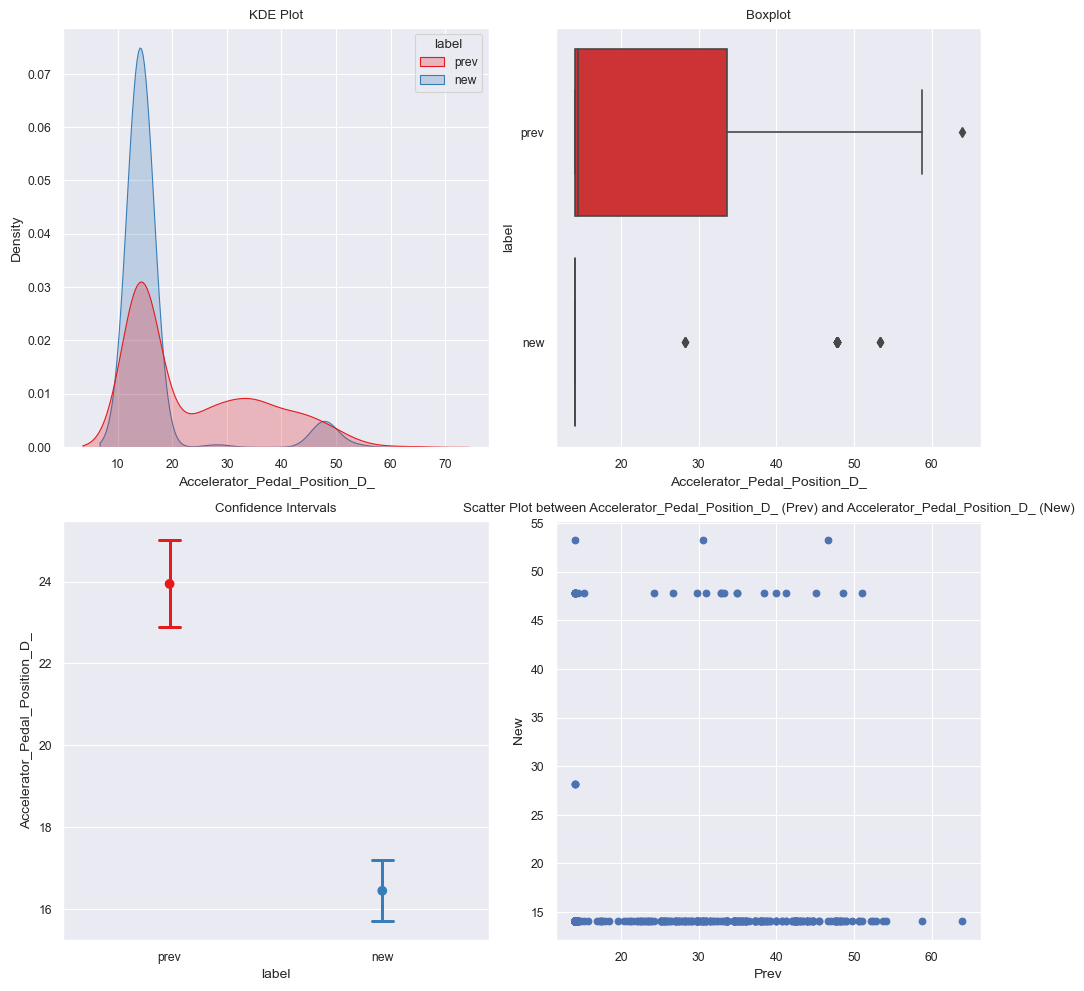

Mean of Accelerator_Pedal_Position_D_ (prev): 23.944
Mean of Accelerator_Pedal_Position_D_ (new): 16.442
Median of Accelerator_Pedal_Position_D_ (prev): 14.500
Median of Accelerator_Pedal_Position_D_ (new): 14.100
Standard deviation of Accelerator_Pedal_Position_D_ (prev): 12.138
Standard deviation of Accelerator_Pedal_Position_D_ (new): 8.548
--------------------
For:  Accelerator_Pedal_Position_E_
t-statistic: 11.311655947556982
P-value: 5.353003339888581e-28
The difference in means is statistically significant, recommendation possible


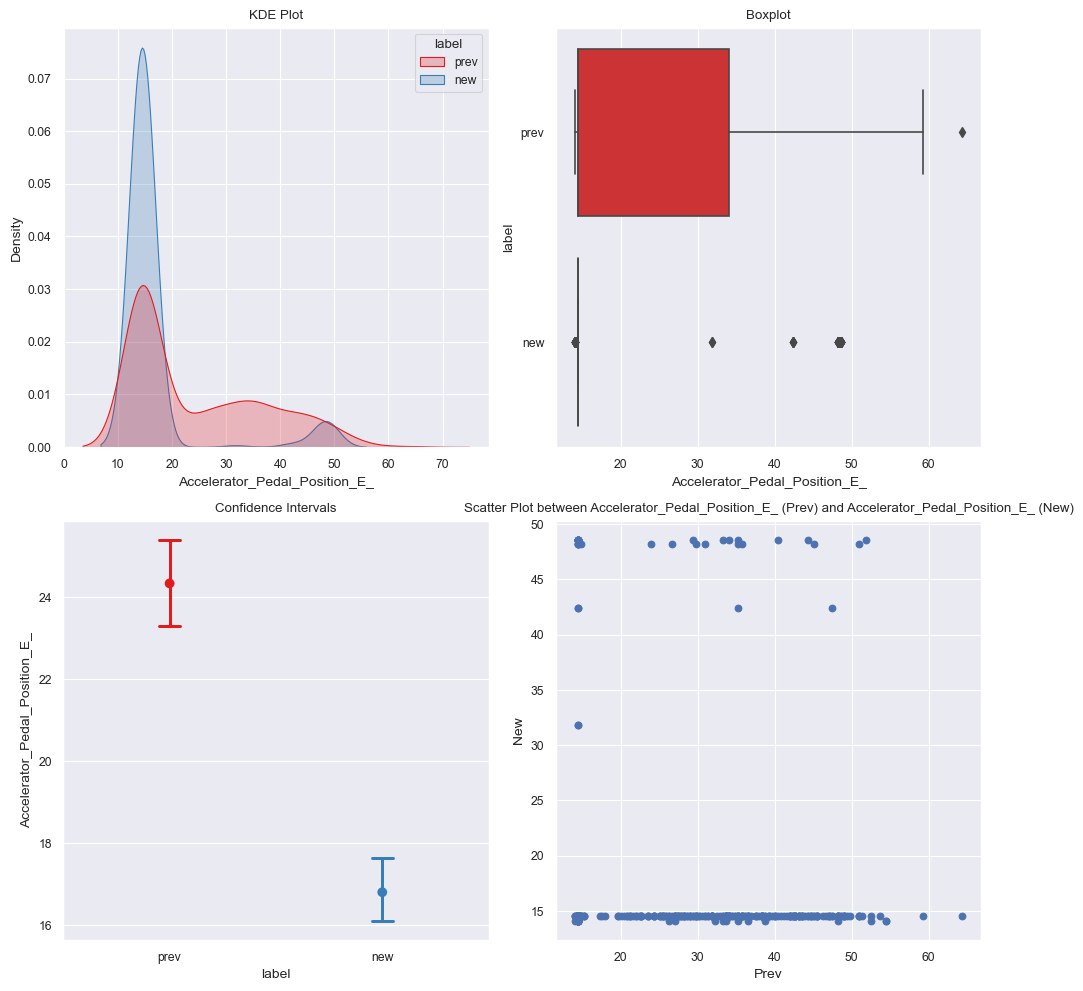

Mean of Accelerator_Pedal_Position_E_ (prev): 24.341
Mean of Accelerator_Pedal_Position_E_ (new): 16.804
Median of Accelerator_Pedal_Position_E_ (prev): 14.500
Median of Accelerator_Pedal_Position_E_ (new): 14.500
Standard deviation of Accelerator_Pedal_Position_E_ (prev): 12.263
Standard deviation of Accelerator_Pedal_Position_E_ (new): 8.437
--------------------


In [4]:
prev_loc = "C:\\Users\\ragha\\OneDrive\\Desktop\\Data_science\\Data_sciecne_project_1\\Project_2\\10.35097-1130\\Final_df\\final_df_preprocessed.csv"
new_loc = "Fleet_4_Predicted.csv"

make_recommendation(prev_loc, new_loc, "**4th Fleet**")